## Data Exploration and Preprocessing

### Objective
In this notebook, we will:
1. Load the dataset for the recommendation system. We will use the small version of the dataset.
2. Perform exploratory data analysis (EDA) to understand the structure and properties of the data.
3. Preprocess the data to make it suitable for machine learning models.

---

### Steps

#### 1. Load the Dataset
- **Description**: We will load the dataset into a Pandas DataFrame and inspect its structure, including rows, columns, and data types.
- **Dataset**: We will use the [MovieLens Dataset](https://grouplens.org/datasets/movielens/) or a synthetic dataset if you prefer.

#### 2. Explore the Data
- **Key Tasks**:
  - Examine the dataset's structure and distribution.
  - Identify important features such as user IDs, item IDs, and interactions (e.g., ratings, clicks).
  - Visualize distributions to identify patterns and anomalies.

#### 3. Handle Missing Values
- **Approach**:
  - Identify missing or null values in the dataset.
  - Decide on strategies to handle them (e.g., imputation or removal).

#### 4. Prepare Data for Training
- **Transformations**:
  - Convert categorical features (e.g., user IDs, item IDs) into numerical representations.
  - Normalize or scale numerical data if necessary.
  - Create train-test splits to evaluate model performance.

#### 5. Save Processed Data
- Save the processed dataset to a file for use in subsequent notebooks.

---

### Exploratory Data Analysis (EDA) Checklist
1. **Inspect Basic Information**:
   - Number of users, items, and interactions.
   - Data types of columns.
2. **Analyze Distributions**:
   - Ratings or interactions per user.
   - Ratings or interactions per item.
3. **Visualizations**:
   - Histograms or bar charts for numerical data.
   - Heatmaps for correlations (if applicable).

---

### Preprocessing Checklist
1. **Feature Transformation**:
   - Encode user IDs and item IDs.
2. **Data Splitting**:
   - Train-test split: Ensure the test set contains unseen interactions.
   - Optional validation split for hyperparameter tuning.
3. **Scaling and Normalization**:
   - Scale numerical features as needed.

---

### Next Steps
After completing the exploration and preprocessing steps, we will proceed to implement a baseline recommendation model.


# 1. Load the Dataset
- **Description**: We will load the dataset into a Pandas DataFrame and inspect its structure, including rows, columns, and data types.
- **Dataset**: We will use the [MovieLens Dataset](https://grouplens.org/datasets/movielens/) or a synthetic dataset if you prefer.

In [11]:
# Step 1: Load the Dataset
import pandas as pd
import os

# Load the MovieLens dataset (adjust the path to your downloaded dataset)
# Example: Assuming we use the 'ratings.csv' file
data_path = './data/ml-latest-small'
df = pd.read_csv(data_path + '/ratings.csv')

# Inspect the dataset structure
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

Dataset Head:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Dataset Description:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000

### Understanding Interactions in the Dataset

In the context of a recommendation system, an **interaction** is defined as a correspondence between a user and an item (e.g., a movie). This is typically represented by a rating or some form of feedback (e.g., like, watch, purchase). 

We can analyze interactions from two perspectives:

---

#### 1. **User Perspective**
- Focuses on the number of items (movies) a particular user has rated or interacted with.
- This helps in understanding:
  - **Active users**: Users who interact with many items.
  - **Inactive users**: Users who interact with fewer items.
- **Example**: A user might have rated 50 movies, meaning they have 50 interactions.

---

#### 2. **Movie Perspective**
- Focuses on the number of users who have rated or interacted with a specific movie.
- This helps in understanding:
  - **Popular items**: Items that have many interactions (frequently rated).
  - **Niche items**: Items that have fewer interactions.
- **Example**: A movie might have been rated by 1,000 users, meaning it has 1,000 interactions.

---

### Importance of Both Perspectives
Both perspectives provide valuable insights:
- **User Perspective**:
  - Helps in building user-specific recommendations by understanding their preferences and activity levels.
- **Movie Perspective**:
  - Helps in identifying item popularity and understanding the distribution of ratings across items.

---

### Real-World Implications
When visualizing the data:
- **Interactions per User**:
  - Often reveals a skewed distribution where some users interact with many items while most interact with only a few.
- **Interactions per Movie**:
  - Similarly, shows a skewed distribution where a small number of items (movies) receive most of the interactions.

This skewness is a common feature of real-world datasets and has implications for:
1. **Model Design**:
   - Addressing the long-tail problem (recommendation of niche items).
2. **Evaluation**:
   - Ensuring the system performs well for both highly active users and less active users.


# 2. Explore the Data
- **Key Tasks**:
  - Examine the dataset's structure and distribution.
  - Identify important features such as user IDs, item IDs, and interactions (e.g., ratings, clicks).
  - Visualize distributions to identify patterns and anomalies.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
ratings = pd.read_csv(data_path + '/ratings.csv')
movies = pd.read_csv(data_path + '/movies.csv')
tags = pd.read_csv(data_path + '/tags.csv')

# Merge ratings with movies for enriched analysis
df = pd.merge(ratings, movies, on='movieId')

df.head()

## Basic Statistics

In [17]:
# Step 1: Basic Statistics
num_users = df['userId'].nunique()
num_items = df['movieId'].nunique()
print(f"\nNumber of users: {num_users}")
print(f"Number of movies: {num_items}")

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Number of users: 610
Number of movies: 9724

Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


## Histograms (Ratings, Interactions (per User, per Movie))

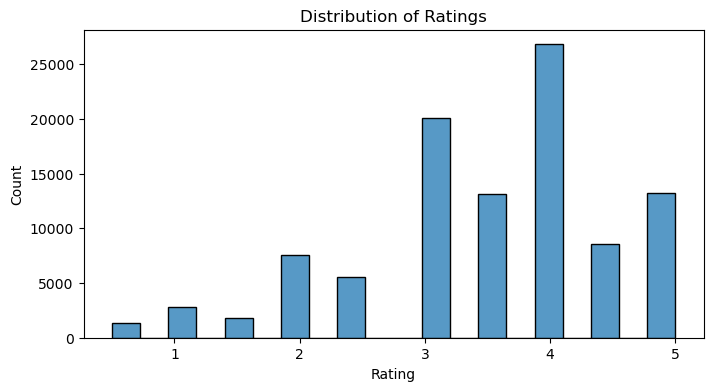

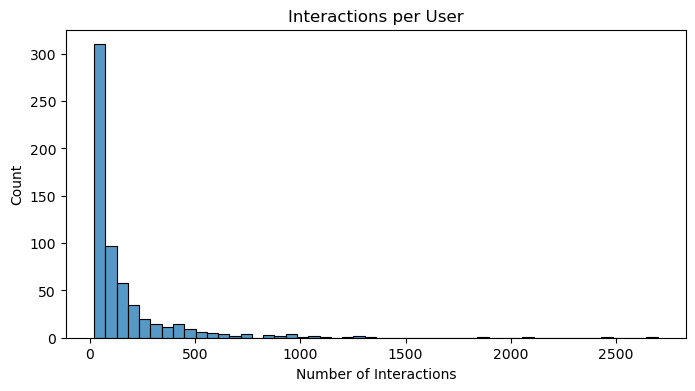

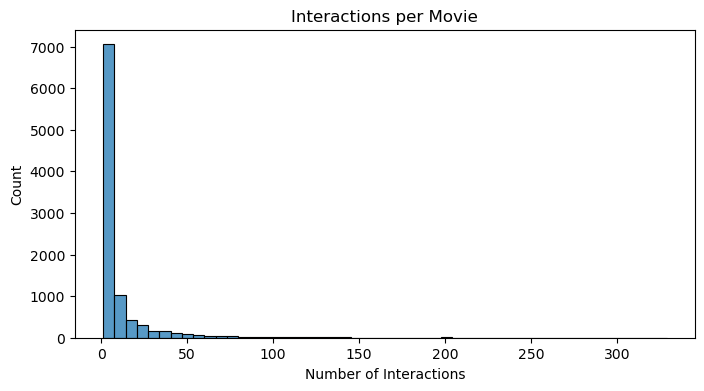

In [18]:
# Step 2: Distribution of Ratings
plt.figure(figsize=(8, 4))
sns.histplot(df['rating'], bins=20, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Step 3: Interactions per User
interactions_per_user = df.groupby('userId').size()
plt.figure(figsize=(8, 4))
sns.histplot(interactions_per_user, bins=50, kde=False)
plt.title('Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Count')
plt.show()

# Step 4: Interactions per Movie
interactions_per_item = df.groupby('movieId').size()
plt.figure(figsize=(8, 4))
sns.histplot(interactions_per_item, bins=50, kde=False)
plt.title('Interactions per Movie')
plt.xlabel('Number of Interactions')
plt.ylabel('Count')
plt.show()

## Genre analysis

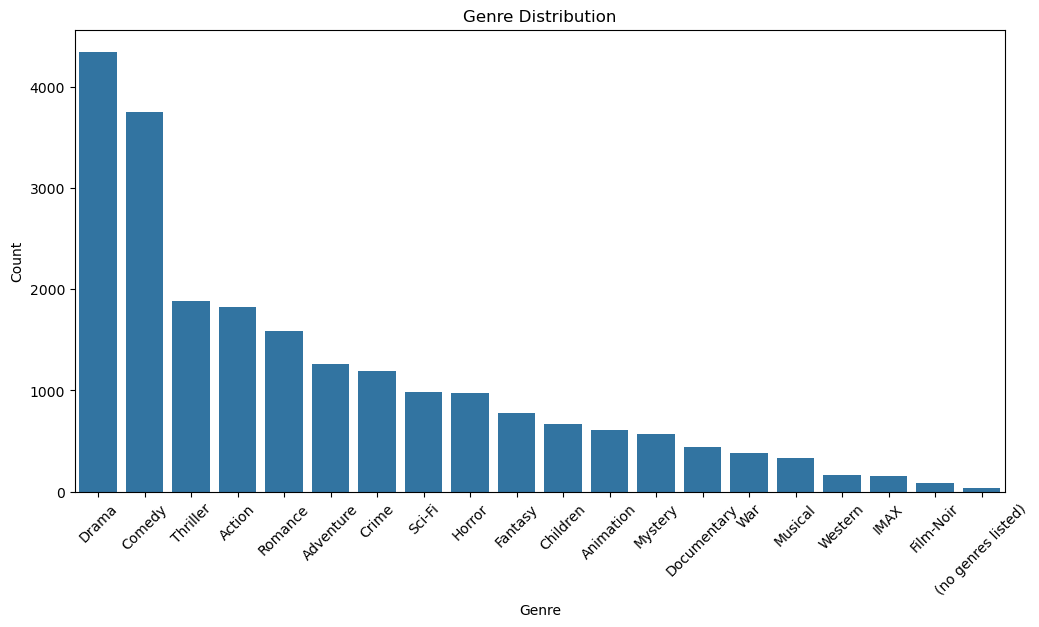

In [ ]:
# Split genres into separate rows for analysis
unique_movies = df[['movieId', 'genres']].drop_duplicates() # we only analyze unique movies
genres = unique_movies['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)
genres.name = 'genre'

# Count occurrences of each genre
genre_counts = genres.value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Tags analysis

In [22]:
# Aggregate tags by movie
movie_tags = tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()

# Merge tags with movies for analysis
tagged_movies = pd.merge(movies, movie_tags, on='movieId', how='left')

popular_tags = tags['tag'].value_counts()
popular_tags.head(10)

tag
In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
surreal               23
Disney                23
religion              22
sci-fi                21
quirky                21
Name: count, dtype: int64

### Example: Interpreting the "Interactions per Item" Histogram

The "Interactions per Item" histogram provides a visual representation of how many items (e.g., movies) have a specific number of interactions (e.g., ratings). Here's how to interpret the axes and the bars:

---

#### 1. **X-Axis (Number of Interactions)**
- Represents the number of interactions each item (movie) has received.
- Example: If the x-axis value is 10, this indicates items that have been rated by 10 users.

---

#### 2. **Y-Axis (Count)**
- Represents the number of items (movies) that have the corresponding number of interactions.
- Example: If the y-axis value is 100 at x=10, this means that **100 movies** have exactly **10 interactions**.

---

#### 3. **Interpreting the Bars**
- Each bar corresponds to a range of interaction counts (depending on bin size).
- **Tall bars on the left (lower x-values)**:
  - Indicate that many items have only a few interactions.
  - Suggests a long-tail distribution, where a majority of items are rated by only a small number of users.
- **Shorter bars on the right (higher x-values)**:
  - Indicate that only a few items have received a large number of interactions.
  - These are the most popular items in the dataset.

---

### Example Interpretation
If the histogram shows:
- A tall bar at x=1: Most movies have been rated by only 1 user (niche items).
- A gradual decline in bar height as x increases: Fewer movies are rated by larger numbers of users.
- A very short bar at x=1,000: Only a handful of movies have been rated by 1,000 users (highly popular items).

---

### Insights Gained
- **Recommendation Challenges**:
  - Popular items dominate interactions, but niche items are harder to recommend due to sparse data.
- **Potential Next Steps**:
  - Address the long-tail problem by ensuring the system recommends both popular and niche items.
